In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
# import mplfinance as mpf
import asyncio
import plotly.express as px
from pathlib import Path
import time as t
import threading
import requests
from requests import Request, Session
import datetime
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

%matplotlib inline


Bad key savefig.frameon in file C:\ProgramData\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\ProgramData\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\ProgramData\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [3]:
from dotenv import load_dotenv
load_dotenv()
cmc_key = os.getenv('CMC_KEY')

***_INDEX TOKENS_***

In [4]:
# Request data from Kuc API & Convert to Json
btc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTC-USDT&startAt=1620360000&endAt=0')
btc_j = btc.json()

# Convert json to DataFrame
btc_df = pd.DataFrame(btc_j['data'])

# Rename Date, Open, & Close columns and remove others
btc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)

btc_df.drop(columns = [3,4,5,6], inplace=True)

# Create A DF with Median Price 

btc_median = btc_df[['Open','Close']].astype(float)

btc_median['BTC Median'] = btc_median[['Open','Close']].mean(axis=1)
btc_median = btc_median['BTC Median']

btc_df_date = pd.to_datetime(btc_df['Date'], unit='s')
btc_date = [btc_df_date, btc_median]
btc_result = pd.concat(btc_date, axis=1, join = 'outer')
btc_plot = btc_result.set_index('Date')
btc_result.set_index('Date', inplace=True)

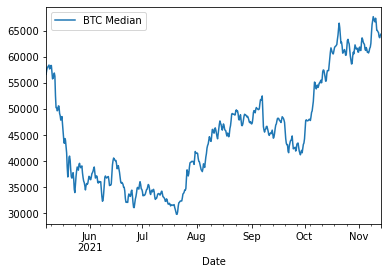

In [5]:
btc_plot.plot();

In [6]:
eth = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ETH-USDT&startAt=1620360000&endAt=0')
eth_j = eth.json()


eth_df = pd.DataFrame(eth_j['data'])


eth_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
eth_df.drop(columns = [3,4,5,6], inplace=True)


eth_median = eth_df[['Open','Close']].astype(float)


eth_median['ETH Median'] = eth_median[['Open','Close']].mean(axis=1)


eth_median = eth_median['ETH Median']


eth_df_date = pd.to_datetime(eth_df['Date'], unit='s')


eth_date = [eth_df_date, eth_median]


eth_result = pd.concat(eth_date, axis=1, join = 'outer')


eth_result.set_index('Date', inplace=True)

eth_result

,ETH Median
Date,
2021-11-13 08:00:00,4661.990
2021-11-13 00:00:00,4654.745
2021-11-12 16:00:00,4618.820
2021-11-12 08:00:00,4641.135
2021-11-12 00:00:00,4714.450
...,...
2021-05-08 16:00:00,3770.255
2021-05-08 08:00:00,3579.080
2021-05-08 00:00:00,3503.850


In [7]:
def crypto_price_df(ticker):
    crypto = requests.get(f'https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol={ticker}-USDT&startAt=1620360000&endAt=0')
    crypto_j = crypto.json()
    crypto_df = pd.DataFrame(crypto_j['data'])
    crypto_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
    crypto_df.drop(columns = [3,4,5,6], inplace=True)
    crypto_median = crypto_df[['Open','Close']].astype(float)
    crypto_median[f'{ticker} Median'] = crypto_median[['Open','Close']].mean(axis=1)
    crypto_median = crypto_median[f'{ticker} Median']
    crypto_df_date = pd.to_datetime(crypto_df['Date'], unit='s')
    crypto_date = [crypto_df_date, crypto_median]
    crypto_result = pd.concat(crypto_date, axis=1, join = 'outer')
    crypto_result.set_index('Date', inplace=True)
    return crypto_result

In [8]:
bnb_result = crypto_price_df('BNB')

In [9]:
crypto_price_df('ETH')

,ETH Median
Date,
2021-11-13 08:00:00,4662.060
2021-11-13 00:00:00,4654.745
2021-11-12 16:00:00,4618.820
2021-11-12 08:00:00,4641.135
2021-11-12 00:00:00,4714.450
...,...
2021-05-08 16:00:00,3770.255
2021-05-08 08:00:00,3579.080
2021-05-08 00:00:00,3503.850


In [23]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_df = pd.DataFrame(doge_j['data'])
doge_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
doge_df.drop(columns = [3,4,5,6], inplace=True)
doge_median = doge_df[['Open','Close']].astype(float)
doge_median['DOGE Median'] = doge_median[['Open','Close']].mean(axis=1)
doge_median = doge_median['DOGE Median']
doge_df_date = pd.to_datetime(doge_df['Date'], unit='s')
doge_date = [doge_df_date, doge_median]
doge_result = pd.concat(doge_date, axis=1, join = 'outer')
doge_result.set_index('Date', inplace=True)

In [24]:
ltc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LTC-USDT&startAt=1620360000&endAt=0')
ltc_j = ltc.json()
ltc_df = pd.DataFrame(ltc_j['data'])
ltc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ltc_df.drop(columns = [3,4,5,6], inplace=True)
ltc_median = ltc_df[['Open','Close']].astype(float)
ltc_median['LTC Median'] = ltc_median[['Open','Close']].mean(axis=1)
ltc_median = ltc_median['LTC Median']
ltc_df_date = pd.to_datetime(ltc_df['Date'], unit='s')
ltc_date = [ltc_df_date, ltc_median]
ltc_result = pd.concat(ltc_date, axis=1, join = 'outer')
ltc_result.set_index('Date', inplace=True)

In [26]:
ada = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ADA-USDT&startAt=1620360000&endAt=0')
ada_j = ada.json()
ada_df = pd.DataFrame(ada_j['data'])
ada_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
ada_df.drop(columns = [3,4,5,6], inplace=True)
ada_median = ada_df[['Open','Close']].astype(float)
ada_median['ADA Median'] = ada_median[['Open','Close']].mean(axis=1)
ada_median = ada_median['ADA Median']
ada_df_date = pd.to_datetime(ada_df['Date'], unit='s')
ada_date = [ada_df_date, ada_median]
ada_result = pd.concat(ada_date, axis=1, join = 'outer')
ada_result.set_index('Date', inplace=True)

In [27]:
xrp = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=XRP-USDT&startAt=1620360000&endAt=0')
xrp_j = xrp.json()
xrp_df = pd.DataFrame(xrp_j['data'])
xrp_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
xrp_df.drop(columns = [3,4,5,6], inplace=True)
xrp_median = xrp_df[['Open','Close']].astype(float)
xrp_median['XRP Median'] = xrp_median[['Open','Close']].mean(axis=1)
xrp_median = xrp_median['XRP Median']
xrp_df_date = pd.to_datetime(xrp_df['Date'], unit='s')
xrp_date = [xrp_df_date, xrp_median]
xrp_result = pd.concat(xrp_date, axis=1, join = 'outer')
xrp_result.set_index('Date', inplace=True)

In [28]:
usdt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=USDT-USDC&startAt=1620360000&endAt=0')
usdt_j = usdt.json()
usdt_df = pd.DataFrame(usdt_j['data'])
usdt_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
usdt_df.drop(columns = [3,4,5,6], inplace=True)
usdt_median = usdt_df[['Open','Close']].astype(float)
usdt_median['USDT Median'] = usdt_median[['Open','Close']].mean(axis=1)
usdt_median = usdt_median['USDT Median']
usdt_df_date = pd.to_datetime(usdt_df['Date'], unit='s')
usdt_date = [usdt_df_date, usdt_median]
usdt_result = pd.concat(usdt_date, axis=1, join = 'outer')
usdt_result.set_index('Date', inplace=True)

In [29]:
link = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LINK-USDT&startAt=1620360000&endAt=0')
link_j = link.json()
link_df = pd.DataFrame(link_j['data'])
link_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
link_df.drop(columns = [3,4,5,6], inplace=True)
link_median = link_df[['Open','Close']].astype(float)
link_median['LINK Median'] = link_median[['Open','Close']].mean(axis=1)
link_median = link_median['LINK Median']
link_df_date = pd.to_datetime(link_df['Date'], unit='s')
link_date = [link_df_date, link_median]
link_result = pd.concat(link_date, axis=1, join = 'outer')
link_result.set_index('Date', inplace=True)

In [30]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_df = pd.DataFrame(uni_j['data'])
uni_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
uni_df.drop(columns = [3,4,5,6], inplace=True)
uni_median = uni_df[['Open','Close']].astype(float)
uni_median['UNI Median'] = uni_median[['Open','Close']].mean(axis=1)
uni_median = uni_median['UNI Median']
uni_df_date = pd.to_datetime(uni_df['Date'], unit='s')
uni_date = [uni_df_date, uni_median]
uni_result = pd.concat(uni_date, axis=1, join = 'outer')
uni_result.set_index('Date', inplace=True)

In [31]:
dot = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOT-USDT&startAt=1620360000&endAt=0')
dot_j = dot.json()
dot_df = pd.DataFrame(dot_j['data'])
dot_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
dot_df.drop(columns = [3,4,5,6], inplace=True)
dot_median = dot_df[['Open','Close']].astype(float)
dot_median['DOT Median'] = dot_median[['Open','Close']].mean(axis=1)
dot_median = dot_median['DOT Median']
dot_df_date = pd.to_datetime(dot_df['Date'], unit='s')
dot_date = [dot_df_date, dot_median]
dot_result = pd.concat(dot_date, axis=1, join = 'outer')
dot_result.set_index('Date', inplace=True)

In [32]:
#sol = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=SOL-USDT&startAt=1620360000&endAt=0')
sol = requests.get('https://api.binance.com/api/v3/klines?symbol=SOLUSDT&interval=8h&startTime=1620360000000&limit=666')
sol_j = sol.json()
sol_df = pd.DataFrame(sol_j)
sol_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
sol_df.drop(columns = [3,4,5,6], inplace=True)
sol_median = sol_df[['Open','Close']].astype(float)
sol_median['SOL Median'] = sol_median[['Open','Close']].mean(axis=1)
sol_median = sol_median['SOL Median']
sol_df_date = pd.to_datetime(sol_df['Date'], unit='ms')
sol_date = [sol_df_date, sol_median]
sol_result = pd.concat(sol_date, axis=1, join = 'outer')
sol_result.set_index('Date', inplace=True)
#sol_result.to_csv('sol_result.csv')

In [33]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_df = pd.DataFrame(luna_j['data'])
luna_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
luna_df.drop(columns = [3,4,5,6], inplace=True)
luna_median = luna_df[['Open','Close']].astype(float)
luna_median['LUNA Median'] = luna_median[['Open','Close']].mean(axis=1)
luna_median = luna_median['LUNA Median']
luna_df_date = pd.to_datetime(luna_df['Date'], unit='s')
luna_date = [luna_df_date, luna_median]
luna_result = pd.concat(luna_date, axis=1, join = 'outer')
luna_result.set_index('Date', inplace=True)

In [34]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_df = pd.DataFrame(avax_j['data'])
avax_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
avax_df.drop(columns = [3,4,5,6], inplace=True)
avax_median = avax_df[['Open','Close']].astype(float)
avax_median['AVAX Median'] = avax_median[['Open','Close']].mean(axis=1)
avax_median = avax_median['AVAX Median']
avax_df_date = pd.to_datetime(avax_df['Date'], unit='s')
avax_date = [avax_df_date, avax_median]
avax_result = pd.concat(avax_date, axis=1, join = 'outer')
avax_result.set_index('Date', inplace=True)

In [35]:
algo = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ALGO-USDT&startAt=1620360000&endAt=0')
algo_j = algo.json()
algo_df = pd.DataFrame(algo_j['data'])
algo_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
algo_df.drop(columns = [3,4,5,6], inplace=True)
algo_median = algo_df[['Open','Close']].astype(float)
algo_median['ALGO Median'] = algo_median[['Open','Close']].mean(axis=1)
algo_median = algo_median['ALGO Median']
algo_df_date = pd.to_datetime(algo_df['Date'], unit='s')
algo_date = [algo_df_date, algo_median]
algo_result = pd.concat(algo_date, axis=1, join = 'outer')
algo_result.set_index('Date', inplace=True)

In [36]:
bch = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BCH-USDT&startAt=1620360000&endAt=0')
bch_j = bch.json()
bch_df = pd.DataFrame(bch_j['data'])
bch_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
bch_df.drop(columns = [3,4,5,6], inplace=True)
bch_median = bch_df[['Open','Close']].astype(float)
bch_median['BCH Median'] = bch_median[['Open','Close']].mean(axis=1)
bch_median = bch_median['BCH Median']
bch_df_date = pd.to_datetime(bch_df['Date'], unit='s')
bch_date = [bch_df_date, bch_median]
bch_result = pd.concat(bch_date, axis=1, join = 'outer')
bch_result.set_index('Date', inplace=True)

In [37]:
matic = requests.get('https://api.binance.com/api/v3/klines?symbol=MATICBUSD&interval=8h&startTime=1620360000000&limit=666')
matic_j = matic.json()
matic_df = pd.DataFrame(matic_j)
matic_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
matic_df.drop(columns = [3,4,5,6], inplace=True)
matic_median = matic_df[['Open','Close']].astype(float)
matic_median['MATIC Median'] = matic_median[['Open','Close']].mean(axis=1)
matic_median = matic_median['MATIC Median']
matic_df_date = pd.to_datetime(matic_df['Date'], unit='ms')
matic_date = [matic_df_date, matic_median]
matic_result = pd.concat(matic_date, axis=1, join = 'outer')
matic_result.set_index('Date', inplace=True)
matic_result.to_csv('matic_result.csv')

In [38]:
vet = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=VET-USDT&startAt=1620360000&endAt=0')
vet_j = vet.json()
vet_df = pd.DataFrame(vet_j['data'])
vet_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
vet_df.drop(columns = [3,4,5,6], inplace=True)
vet_median = vet_df[['Open','Close']].astype(float)
vet_median['VET Median'] = vet_median[['Open','Close']].mean(axis=1)
vet_median = vet_median['VET Median']
vet_df_date = pd.to_datetime(vet_df['Date'], unit='s')
vet_date = [vet_df_date, vet_median]
vet_result = pd.concat(vet_date, axis=1, join = 'outer')
vet_result.set_index('Date', inplace=True)
vet_result.to_csv('vet_result.csv')

In [39]:
xlm = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=XLM-USDT&startAt=1620360000&endAt=0')
xlm_j = xlm.json()
xlm_df = pd.DataFrame(xlm_j['data'])
xlm_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
xlm_df.drop(columns = [3,4,5,6], inplace=True)
xlm_median = xlm_df[['Open','Close']].astype(float)
xlm_median['XLM Median'] = xlm_median[['Open','Close']].mean(axis=1)
xlm_median = xlm_median['XLM Median']
xlm_df_date = pd.to_datetime(xlm_df['Date'], unit='s')
xlm_date = [xlm_df_date, xlm_median]
xlm_result = pd.concat(xlm_date, axis=1, join = 'outer')
xlm_result.set_index('Date', inplace=True)
xlm_result.to_csv('xlm_result.csv')

In [40]:
index_tokens = pd.concat([btc_result, dot_result, eth_result, ada_result, doge_result, ltc_result, bnb_result, 
                          xrp_result, uni_result, link_result, usdt_result, sol_result,
                          luna_result, avax_result,algo_result,bch_result,matic_result,vet_result,xlm_result], axis=1, join='outer')
index_tokens

,BTC Median,DOT Median,ETH Median,ADA Median,DOGE Median,LTC Median,BNB Median,XRP Median,UNI Median,LINK Median,USDT Median,SOL Median,LUNA Median,AVAX Median,ALGO Median,BCH Median,MATIC Median,VET Median,XLM Median
Date,,,,,,,,,,,,,,,,,,,
2021-05-07 08:00:00,56646.50,41.14195,3497.655,1.660197,0.616585,360.1460,628.6850,1.599015,40.33190,47.83170,1.00120,43.6405,16.58110,40.7880,1.61335,1380.700,0.775970,0.237118,0.641885
2021-05-07 16:00:00,57412.80,40.99945,3520.205,1.675168,0.645165,348.3150,630.2115,1.601355,40.20290,49.03290,1.00105,45.5925,16.62005,39.7960,1.63180,1363.225,0.783145,0.235386,0.638721
2021-05-08 00:00:00,57881.45,40.01940,3503.850,1.646801,0.698930,345.5525,626.4420,1.589135,39.68295,48.89850,1.00120,43.4105,16.69475,38.1540,1.57680,1367.775,0.757820,0.229597,0.633495
2021-05-08 08:00:00,58026.20,39.51780,3579.080,1.603436,0.679830,340.6505,634.3460,1.573590,39.83970,47.80075,1.00140,44.5620,16.81700,37.9750,1.54110,1365.365,0.772760,0.225588,0.624349
2021-05-08 16:00:00,58229.95,39.39945,3770.255,1.594860,0.644480,341.1250,643.0210,1.554750,40.26905,47.78225,1.00160,45.1070,16.89560,37.9595,1.51145,1366.500,0.803115,0.222768,0.613370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12 00:00:00,64623.30,46.80525,4714.450,2.066076,0.260550,266.2455,625.6915,1.208980,25.28210,34.21055,1.00055,236.2150,49.52905,86.9550,2.08200,671.630,1.765500,0.162326,0.386506
2021-11-12 08:00:00,63821.80,45.60475,4641.135,2.033943,0.257310,260.8680,618.1070,1.186725,24.75285,33.57260,1.00035,229.8850,47.99525,84.2530,2.19060,660.135,1.721500,0.157022,0.377320
2021-11-12 16:00:00,63649.20,45.45685,4618.820,2.029451,0.256705,251.3105,620.1250,1.178960,24.42275,33.82735,1.00020,227.8250,48.47660,83.6125,2.18875,659.635,1.702500,0.156589,0.375675


In [89]:
index_results1 = pd.DataFrame(index_tokens.values*markdom_result.values, columns=markdom_result.columns, index=index_tokens.index)
index_results1['SUM'] = (index_results1['BTC']+index_results1['DOT']+index_results1['ETH']+index_results1['ADA']+index_results1['DOGE']+
                         index_results1['LINK']+index_results1['UNI']+index_results1['XRP']+index_results1['BNB']+index_results1['LTC']+
                         index_results1['USDT']+index_results1['SOL']+index_results1['LUNA']+index_results1['AVAX']+index_results1['ALGO']+
                         index_results1['BCH']+index_results1['MATIC']+index_results1['VET']+index_results1['XLM'])
ax = index_results1['SUM'].plot()


ValueError: operands could not be broadcast together with shapes (571,19) (569,19) 

In [90]:
btc_weight = 0.50749
dot_weight = 0.01924
eth_weight = 0.23604
ada_weight= 0.02868
doge_weight = 0.01440
ltc_weight = 0.00779
bnb_weight = 0.04367
xrp_weight = 0.02372
uni_weight = 0.00661
link_weight = 0.00661
usdt_weight = 0.03069
sol_weight = 0.02927
luna_weight = 0.00968
avax_weight = 0.00803
algo_weight = 0.00590
bch_weight = 0.00531
matic_weight = 0.00496
vet_weight = 0.00437
xlm_weight = 0.00389

In [91]:
index_returns = (btc_weight*index_tokens['BTC Median']+dot_weight*index_tokens['DOT Median']+
                 eth_weight*index_tokens['ETH Median']+ada_weight*index_tokens['ADA Median']+
                 doge_weight*index_tokens['DOGE Median']+ltc_weight*index_tokens['LTC Median']+
                 bnb_weight*index_tokens['BNB Median']+xrp_weight*index_tokens['XRP Median']+
                 uni_weight*index_tokens['UNI Median']+link_weight*index_tokens['LINK Median']+
                 usdt_weight*index_tokens['USDT Median']+sol_weight*index_tokens['SOL Median']+
                 luna_weight*index_tokens['LUNA Median']+avax_weight*index_tokens['AVAX Median']+
                 algo_weight*index_tokens['ALGO Median']+bch_weight*index_tokens['BCH Median']+
                 matic_weight*index_tokens['MATIC Median']+vet_weight*index_tokens['VET Median']+
                 xlm_weight*index_tokens['XLM Median'])

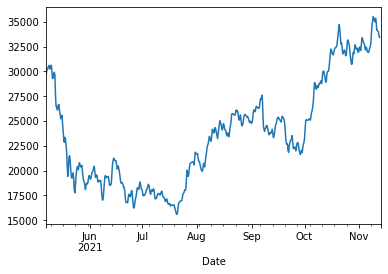

In [93]:
index_returns.plot(kind='line');

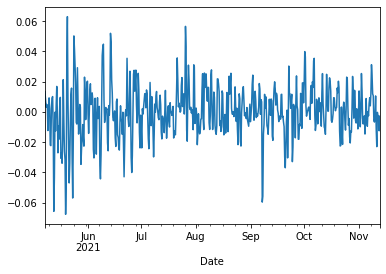

In [65]:
index_pct = index_returns.pct_change().dropna()
index_pct.plot();

***_MEME/GAMING TOKENS_***

In [ ]:
doge = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=DOGE-USDT&startAt=1620360000&endAt=0')
doge_j = doge.json()
doge_j

In [ ]:
elon = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ELON-USDT&startAt=1620360000&endAt=0')
elon_j = elon.json()
elon_j

***_DEFI TOKENS_***

In [ ]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_j

In [ ]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_j

In [ ]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_j

***_STORAGE TOKENS_***

In [ ]:
fil = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=FIL-USDT&startAt=1620360000')
fil_j = fil.json()
fil_j

In [ ]:
btt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTT-USDT&startAt=1620360000')
btt_j = btt.json()
btt_j

In [ ]:
storj = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=STORJ-USDT&startAt=1620360000')
storj_j = storj.json()
storj_j